         Date ProductID ProductName     Category  QuantitySold  PricePerUnit  \
0  2022-01-28      P189   Product_8       Beauty            11        484.73   
1  2022-03-19      P159   Product_9  Electronics            12        433.16   
2  2022-08-07      P199  Product_11       Sports             6        431.59   
3  2023-08-03      P195  Product_13     Clothing             6        189.92   
4  2023-03-10      P190  Product_12     Clothing             9        477.63   

   TotalSales  
0     5332.03  
1     5197.92  
2     2589.54  
3     1139.52  
4     4298.67  
         Date MarketingChannel        Category     Cost
0  2021-01-31     Facebook Ads        Clothing  8540.22
1  2021-02-28    Instagram Ads          Sports  4813.46
2  2021-03-31     Facebook Ads  Home & Kitchen  7135.31
3  2021-04-30    Instagram Ads     Electronics  6296.22
4  2021-05-31       Affiliates  Home & Kitchen  6868.99
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns 

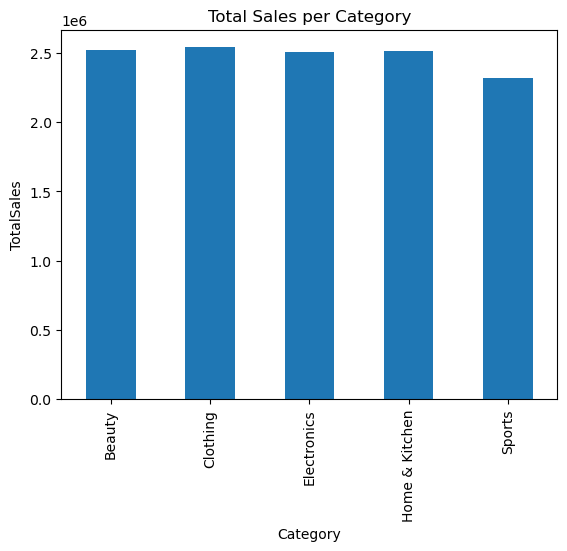

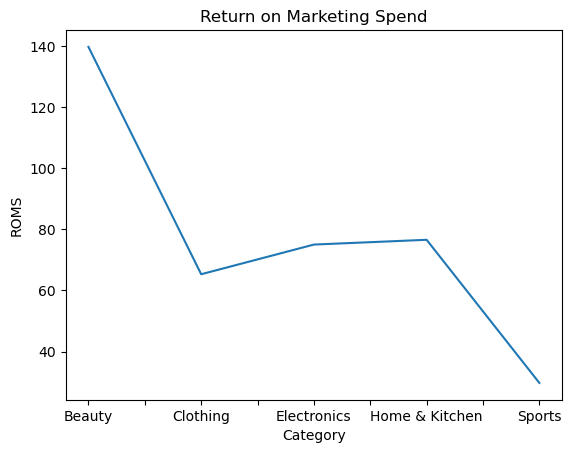

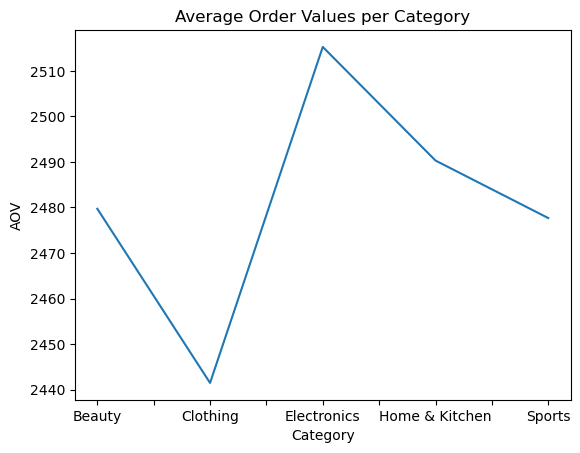

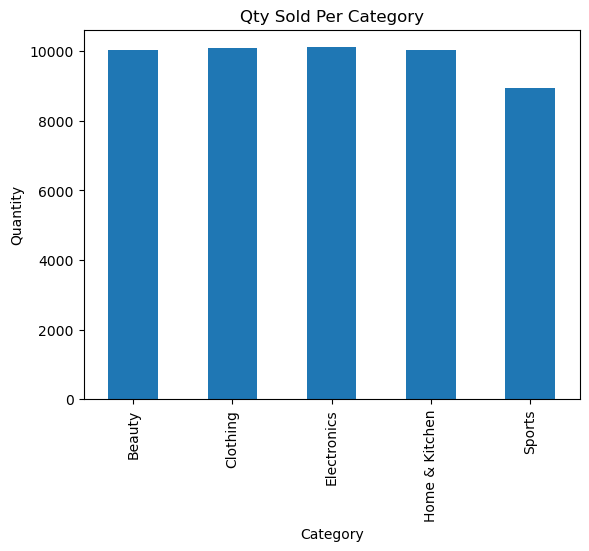

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sd = pd.read_excel(r'C:\Users\ashra\Desktop\SDBI Stuff\Sem I\Python\Pilgrim\Sales Data_.xlsx', sheet_name='SalesData')
mc = pd.read_excel(r'C:\Users\ashra\Desktop\SDBI Stuff\Sem I\Python\Pilgrim\Sales Data_.xlsx', sheet_name='MarketingCosts')

print(sd.head())

print(mc.head())

print(sd.info())

print(mc.info())

print(sd.isna().sum())

print(mc.isna().sum())

sd.dropna(inplace=True)
mc.dropna(inplace=True)

total_sales = sd.groupby('Category')['TotalSales'].sum()
print(total_sales)

roms = (total_sales / mc.groupby('Category')['Cost'].sum())
print(roms)

total_sales = sd.groupby('Category')['TotalSales'].sum()
total_orders = sd.groupby('Category')['TotalSales'].count()
aov = total_sales/total_orders
print(aov)

qtysold= sd.groupby('Category')['QuantitySold'].sum()
print(qtysold)

total_sales.plot(kind='bar', title='Total Sales per Category', ylabel='TotalSales', xlabel='Category')
plt.show()

roms.plot(kind='line', title='Return on Marketing Spend', ylabel='ROMS', xlabel='Category')
plt.show()

aov.plot(kind='line', title='Average Order Values per Category', ylabel='AOV', xlabel='Category')
plt.show()

qtysold.plot(kind='bar', title='Qty Sold Per Category', ylabel='Quantity', xlabel='Category')
plt.show()

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('kpi_dashboard.pdf') as pdf:
    total_sales.plot(kind='bar', title='Total Sales per Category', ylabel='TotalSales', xlabel='Category')
    pdf.savefig()
    plt.close()

    roms.plot(kind='line', title='Return on Marketing Spend', ylabel='ROMS', xlabel='Category')
    pdf.savefig()
    plt.close()

    aov.plot(kind='line', title='Average Order Values per Category', ylabel='AOV', xlabel='Category')
    pdf.savefig()
    plt.close()

    qtysold.plot(kind='bar', title='Qty Sold Per Category', ylabel='Quantity', xlabel='Category')
    pdf.savefig()
    plt.close()